<a href="https://colab.research.google.com/github/ElaYJ/Study_Deep_Learning/blob/main/Framework/PyTorch/22_Deep_Learning_Flow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 전체 딥러닝 플로우 구현 해보기

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

#### 데이터 Load 와 전처리

In [2]:
import torch
from torchvision import datasets, transforms

In [3]:
batch_size = 32
test_batch_size = 32

In [4]:
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('dataset/', download=True, train=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize(mean=(0.5,), std=(0.5,)) #--> (img - mean) / std
                   ])),
    batch_size=batch_size,
    shuffle=True)

Failed to download (trying next):
HTTP Error 503: Service Unavailable



100%|██████████| 9912422/9912422 [00:00<00:00, 50806736.37it/s]


Extracting dataset/MNIST/raw/train-images-idx3-ubyte.gz to dataset/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 1629810.88it/s]

Extracting dataset/MNIST/raw/train-labels-idx1-ubyte.gz to dataset/MNIST/raw



Failed to download (trying next):
HTTP Error 503: Service Unavailable



100%|██████████| 1648877/1648877 [00:00<00:00, 13720999.44it/s]


Extracting dataset/MNIST/raw/t10k-images-idx3-ubyte.gz to dataset/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 14153438.91it/s]


Extracting dataset/MNIST/raw/t10k-labels-idx1-ubyte.gz to dataset/MNIST/raw



In [5]:
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('dataset', train=False,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.,), (1.))
                   ])),
    batch_size=test_batch_size,
    shuffle=True)

#### 데이터 확인

PyTorch에서는 TF와 이미지를 표현하는데 있어서 차이점이 있음.

- TF - (batch, height, width, __channel__)
- PyTorch - (batch, __channel__, height, width)

In [6]:
images, labels = next(iter(train_loader))

In [7]:
images.shape

torch.Size([32, 1, 28, 28])

In [8]:
labels.shape

torch.Size([32])

In [9]:
images[0].shape

torch.Size([1, 28, 28])

In [10]:
images[0][0, :5, :]

tensor([[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000

In [11]:
torch_image = torch.squeeze(images[0])
torch_image.shape

torch.Size([28, 28])

In [12]:
labels[0]

tensor(2)

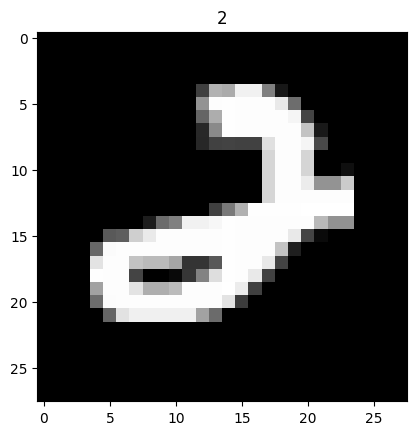

In [13]:
image = torch_image.numpy()

label = labels[0].numpy()

plt.title(label)
plt.imshow(image, 'gray')
plt.show()

### 모델 정의

In [14]:
from torch import nn # functional 함수들 - 학습할 파라미터가 있는 것들
import torch.nn.functional as F # 학습할 파라미터가 없는 것들

In [ ]:
# nn.Conv2d(
#     in_channels: int, out_channels: int, kernel_size: _size_2_t, stride: _size_2_t = 1, padding: _size_2_t | str = 0,
#     dilation: _size_2_t = 1, groups: int = 1, bias: bool = True, padding_mode: str = 'zeros',
#     device: Any | None = None, dtype: Any | None = None
# ) -> None

In [15]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5, 1) # in_channels, out_channels, kernel_size, stride
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.fc1 = nn.Linear(4*4*50, 500) # in_features, out_features
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)

        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)

        x = x.view(-1, 4*4*50)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)

        return F.log_softmax(x, dim=1)

In [16]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = Net().to(device)

In [17]:
print(model)

Net(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(20, 50, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=800, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)


### 학습 로직

- epoch

    - batch

        - model
        - loss
        - grad
        - model(weights) update
</br>
- PyTorch에서는 model을 Training 모드로 변경 후 Training 할 수 있다.

#### Training mode로 !

In [20]:
model.train()

Net(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(20, 50, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=800, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)

#### Evaluation mode로 !

In [21]:
model.eval()

Net(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(20, 50, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=800, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)

In [18]:
import torch.optim as optim

In [19]:
optimizer = optim.SGD(model.parameters(), lr=0.003)
#--> SGD에 모델이 학습해야 할 weights와 learning_rate를 등록해준다.

In [24]:
model.parameters() #--> 모델이 학습해야할 weights

<generator object Module.parameters at 0x79b77c9bfd80>

In [23]:
x, y = next(iter(train_loader))
x.shape, y.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [28]:
for epoch in range(1):
    # Train Mode
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):

        data, target = data.to(device), target.to(device)

        optimizer.zero_grad()

        output = model(data)

        # Compute the "negative log likelihood" loss.
        # 모델의 출력층 활성함수인 F.log_softmax()와 함께 사용하면 One-Hot Encoding 효과를 볼 수 있다.
        loss = F.nll_loss(output, target)

        loss.backward()

        optimizer.step() #--> gradiants 값을 계속 누적하게 됨. 초기화가 필요.

        if batch_idx % 300 == 0:
            print("batch {} --> loss : {}".format(batch_idx, loss.item()))

    # Evalu Mode
    model.eval()

    test_loss = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            test_loss += F.nll_loss(output, target).item()
            # test data의 전체 loss를 더한 후

    # loss 전체 평균을 구한다.
    test_loss /= (len(test_loader.dataset) // 32)

    print("Epoch {} --> test loss : {}".format(epoch+1, test_loss))

batch 0 --> loss : 0.09350026398897171
batch 300 --> loss : 0.11025112867355347
batch 600 --> loss : 0.17234888672828674
batch 900 --> loss : 0.0472576729953289
batch 1200 --> loss : 0.16492687165737152
batch 1500 --> loss : 0.13221439719200134
batch 1800 --> loss : 0.023968318477272987
Epoch 0 --> test loss : 1.4231613599337065


In [ ]:
for epoch in range(10):
    # Train Mode
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):

        data, target = data.to(device), target.to(device)

        optimizer.zero_grad()

        output = model(data)
        loss = F.cross_entropy(output, target)

        loss.backward()

        optimizer.step()

        if batch_idx % 1000 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100 * batch_idx / len(train_loader), loss.item(), end="\r"
            ))

    # Evaluation Mode
    model.eval()

    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.cross_entropy(output, target, reduction='sum').item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average Loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset), 100. * correct / len(test_loader.dataset)))

### Evaluation

- autograd engine, 즉 backpropagatin이나 gradient 계산 등을 꺼서 memory usage를 줄이고 속도를 높임

In [ ]:
# Test mode
model.eval()
test_loss = 0
correct = 0
with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        output = model(data)
        test_loss += F.cross_entropy(output, target, reduction='sum').item() # sum up batch loss
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()

test_loss /= len(test_loader.dataset)

print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))


Test set: Average loss: 0.4822, Accuracy: 8651/10000 (87%)

